In [21]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt


In [22]:
# Load dataset
(train_images, train_labels), (test_images, test_labels) = keras.datasets.fashion_mnist.load_data()

# Normalize (0–1 range)
train_images = train_images / 255.0
test_images = test_images / 255.0

# Reshape for CNN (28x28 → add channel dim)
train_images = train_images.reshape(-1, 28, 28, 1)
test_images = test_images.reshape(-1, 28, 28, 1)

# Class labels
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


In [23]:
model = keras.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [24]:
history = model.fit(train_images, train_labels, epochs=5,
                    validation_data=(test_images, test_labels))


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 30s 15ms/step - accuracy: 0.7698 - loss: 0.6340 - val_accuracy: 0.8756 - val_loss: 0.3450
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 27s 14ms/step - accuracy: 0.8896 - loss: 0.3020 - val_accuracy: 0.8907 - val_loss: 0.2996
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 25s 13ms/step - accuracy: 0.9026 - loss: 0.2596 - val_accuracy: 0.9048 - val_loss: 0.2668
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 27s 15ms/step - accuracy: 0.9186 - loss: 0.2206 - val_accuracy: 0.9021 - val_loss: 0.2698
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 28s 15ms/step - accuracy: 0.9297 - loss: 0.1890 - val_accuracy: 0.9117 - val_loss: 0.2472


In [25]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f"Test accuracy: {test_acc:.2f}")


313/313 - 2s - 6ms/step - accuracy: 0.9117 - loss: 0.2472
Test accuracy: 0.91


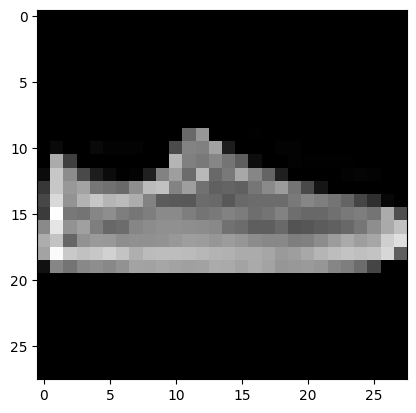

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step
Predicted: Sneaker
Actual: Sneaker


In [26]:
# Show one test image
idx = 12
plt.imshow(test_images[idx].reshape(28,28), cmap="gray")
plt.show()

prediction = model.predict(test_images[idx].reshape(1,28,28,1))
print("Predicted:", class_names[np.argmax(prediction)])
print("Actual:", class_names[test_labels[idx]])


In [41]:
import cv2
import numpy as np

def preprocess_image(path):
    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (28,28))

    # Check background: if mean > 127, assume white background
    if np.mean(img) > 127:
        img = cv2.bitwise_not(img)  # invert
    
    img = img / 255.0
    img = img.reshape(1,28,28,1)
    return img

# Usage
img = preprocess_image("sandal.jpg")
prediction = model.predict(img)
print("Predicted:", class_names[np.argmax(prediction)])



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
Predicted: Sandal


In [39]:
model.save("fashion_mnist_model.h5")
